<a href="https://colab.research.google.com/github/sid-mishra910/Book-Recommendation-System/blob/master/Book_Recommendation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
cd drive/My Drive/Book Recommendation System/

/content/drive/My Drive/Book Recommendation System


In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import warnings

from keras.layers import Input, Embedding, Flatten, Dot, Dense, concatenate
from keras.models import Model

In [5]:
dataset = pd.read_csv('ratings.csv')

In [8]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(dataset, test_size=0.2, random_state=42)

In [27]:
test.shape

(196352, 3)

In [26]:
train.shape

(785404, 3)

In [25]:
dataset.shape

(981756, 3)

In [9]:
n_users = len(dataset.user_id.unique())
n_books = len(dataset.book_id.unique())

In [11]:
dataset.head()

,book_id,user_id,rating
0,1,314,5
1,1,439,3
2,1,588,5
3,1,1169,4
4,1,1185,4


In [12]:
book_input = Input(shape=[1], name="Book-Input")
book_embedding = Embedding(n_books+1, 5, name ="Book-Embedding")(book_input)

In [13]:
book_vec = Flatten(name='Flatten-Books')(book_embedding)

In [14]:
user_input = Input(shape=[1],name = "User-Input")
user_embedding = Embedding(n_users+1, 5, name = "User-Embedding")(user_input)
user_vec = Flatten(name='Flatten-Users')(user_embedding)


In [15]:
prod = Dot(name="Dot-Product",axes=1)([book_vec,user_vec])

In [17]:
model = Model([user_input,book_input],prod)
model.compile('adam','mean_squared_error')

In [18]:
history = model.fit([train.user_id, train.book_id], train.rating, epochs = 10, verbose =1)
model.save('regression_model.h5')

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Epoch 1/10
785404/785404 [==============================] - 128s 162us/step - loss: 13.2363
Epoch 2/10
785404/785404 [==============================] - 126s 160us/step - loss: 3.8117
Epoch 3/10
785404/785404 [==============================] - 123s 157us/step - loss: 1.6311
Epoch 4/10
785404/785404 [==============================] - 123s 157us/step - loss: 1.1415
Epoch 5/10
785404/785404 [==============================] - 117s 149us/step - loss: 0.9426
Epoch 6/10
785404/785404 [==============================] - 105s 133us/step - loss: 0.8407
Epoch 7/10
785404/785404 [==============================] - 103s 132us/step - loss: 0.7811
Epoch 8/10
785404/785404 [==============================] - 98s 125us/step - loss: 0.7447
Epoch 9/10
785404/785404 [==============================] - 97s 123us/step - loss: 0.7194
Epoch 10/10
785404/785404 [==============================] - 97s 124us/step - loss: 0.7023


Text(0, 0.5, 'Training Error')

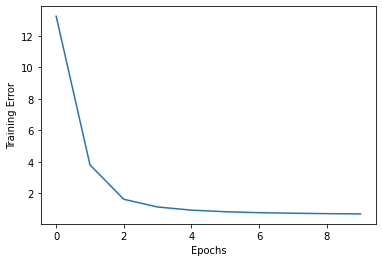

In [20]:
plt.plot(history.history['loss'])
plt.xlabel("Epochs")
plt.ylabel("Training Error")

In [21]:
model.evaluate([test.user_id, test.book_id], test.rating)

196352/196352 [==============================] - 4s 18us/step


0.9103225125910561

In [87]:
test.user_id.head(10)

646451    19643
614851     8563
974393    52110
21471     33864
272540    16587
235240    52668
874406    38264
414606    52864
283254    36535
432283    36242
Name: user_id, dtype: int64

In [28]:
predictions = model.predict([test.user_id.head(10), test.book_id.head(10)])

In [29]:
[print(predictions[i], test.rating.iloc[i]) for i in range(0,10)]

[5.201104] 5
[4.129974] 4
[3.0906575] 3
[4.1811466] 5
[3.1552963] 3
[4.2133856] 3
[3.9150782] 3
[4.927992] 4
[4.156848] 3
[4.772269] 5


[None, None, None, None, None, None, None, None, None, None]

In [30]:
book_em = model.get_layer('Book-Embedding')
book_em_weights = book_em.get_weights()[0]

In [34]:
print(book_em)
print(type(book_em))
# print(book_em_weights)
# print(book_em_weights.shape)

<class 'keras.layers.embeddings.Embedding'>


In [31]:
from sklearn.decomposition import PCA
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [35]:
pca = PCA(n_components= 2)
pca_results = pca.fit_transform(book_em_weights)

In [36]:
pca_results

array([[-0.68162936, -1.2788715 ],
       [ 0.5566808 , -0.90955013],
       [ 0.7300825 , -1.708662  ],
       ...,
       [ 0.5643332 ,  0.6052657 ],
       [ 0.38809747, -0.150117  ],
       [ 0.18191926,  0.370534  ]], dtype=float32)

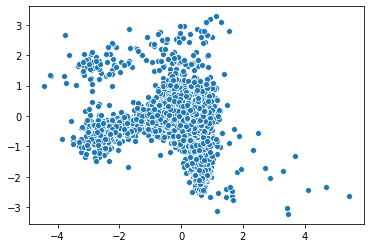

In [37]:
sns.scatterplot(x = pca_results[:,0], y= pca_results[:,1])

In [75]:
book_data = np.array(list(set(dataset.book_id)))
user = np.array([1 for i in range(len(book_data))])

In [76]:
predictions = model.predict([user,book_data])

In [89]:
predictions

array([3.1908667, 2.358861 , 2.640325 , ..., 4.323685 , 3.8626382,
       4.207743 ], dtype=float32)

In [78]:
predictions = np.array([a[0] for a in predictions])

In [79]:
predictions

array([3.1908667, 2.358861 , 2.640325 , ..., 4.323685 , 3.8626382,
       4.207743 ], dtype=float32)

In [90]:
recommended_book_ids = (-predictions).argsort()[:2]

In [91]:
recommended_book_ids

array([6088, 7830])

In [92]:
predictions[recommended_book_ids]

array([6.2604833, 6.0777693], dtype=float32)

In [93]:
books = pd.read_csv('books.csv')

In [94]:
books.head()

,id,book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,title,language_code,average_rating,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,"The Hunger Games (The Hunger Games, #1)",eng,4.34,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,Harry Potter and the Sorcerer's Stone (Harry P...,eng,4.44,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...
2,3,41865,41865,3212258,226,316015849,9.780316e+12,Stephenie Meyer,2005.0,Twilight,"Twilight (Twilight, #1)",en-US,3.57,3866839,3916824,95009,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...
3,4,2657,2657,3275794,487,61120081,9.780061e+12,Harper Lee,1960.0,To Kill a Mockingbird,To Kill a Mockingbird,eng,4.25,3198671,3340896,72586,60427,117415,446835,1001952,1714267,https://images.gr-assets.com/books/1361975680m...,https://images.gr-assets.com/books/1361975680s...
4,5,4671,4671,245494,1356,743273567,9.780743e+12,F. Scott Fitzgerald,1925.0,The Great Gatsby,The Great Gatsby,eng,3.89,2683664,2773745,51992,86236,197621,606158,936012,947718,https://images.gr-assets.com/books/1490528560m...,https://images.gr-assets.com/books/1490528560s...


In [95]:
res = pd.DataFrame(books[books['id'].isin(recommended_book_ids)])

In [96]:
res

,id,book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,title,language_code,average_rating,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
6087,6088,15808287,15808287,21532921,13,525953612,9.780526e+12,Jennifer Chiaverini,2013.0,Mrs. Lincoln's Dressmaker,Mrs. Lincoln's Dressmaker,eng,3.41,16366,18509,2851,722,2519,6540,5846,2882,https://images.gr-assets.com/books/1350586527m...,https://images.gr-assets.com/books/1350586527s...
7829,7830,41704,41704,41240,53,743449673,9.780743e+12,Clive Cussler,1996.0,Shock Wave,"Shock Wave (Dirk Pitt, #13)",en-GB,3.93,12527,13499,267,61,450,3666,5546,3776,https://s.gr-assets.com/assets/nophoto/book/11...,https://s.gr-assets.com/assets/nophoto/book/50...
